# 2.3.5 No Feasible Solution

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BFDdfYJiD3Bq9oxTzonnlAmGsTrEIgJP?usp=sharing)

A linear programming problem has no feasible solution if the set of points corresponding to the feasible region is empty. For example, the constraints

$$
-x_1 + x_2 \geq 4  \text{ and }  x_1 + 2x_2 \leq -4   
$$

where $x_1, x_2 \geq 0$, represent conditions that cannot simultaneously be satisfied by any point. **Figure 2.5** shows the four half-planes whose intersection is empty.
<br />
<br />

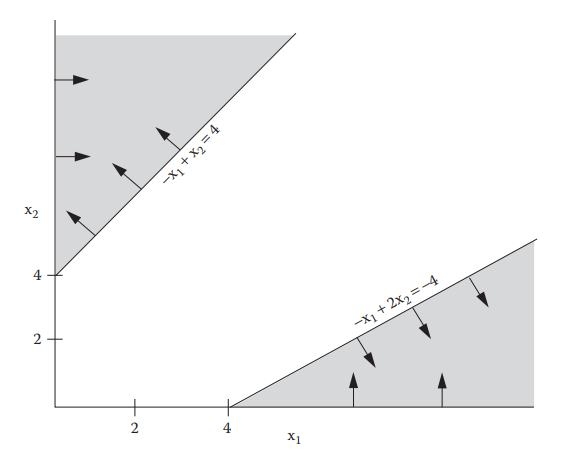
<br />

FIGURE 2.5
<br />

No feasible solution
<br />
<br />

In small problems, infeasibilities such as this may be discovered visually during an attempted graphical solution. In larger problems, it may not be obvious, by inspecting a particular set of constraints, that no solution is possible. Fortunately, the general solution method to be described in the following sections is not only capable of solving typical maximization or minimization problems, but it also provides mechanisms for recognizing problems that have multiple optimal solutions, no optimal solution, or no feasible solution.

**Code Implementation**

No feasible region found


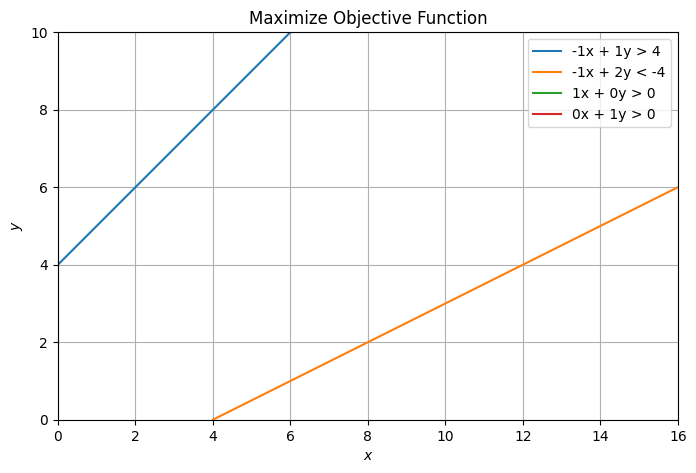

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from itertools import combinations
import ipywidgets as widgets

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def graphical_method(obj_type, a, b, constraints):
    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(0, 16)
    plt.ylim(0, 10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def solve_example():
    example = [
        ("maximize", 1, 1, [(-1, 1, 4, '>'), (-1, 2, -4, '<'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)

solve_example()